# Exercise Search Algorithms #


In the last session, we prepared different classes that are useful to solve search problems. You completed the Node class that we can use now for our first search strategy *breadth_first_tree_search*.

If you had problems implementing the node class, please come and see me. Without the Node class, you can't solve the following exercises.

First, you need to implement the breadth first search strategy:

Hints: 
- create the FIFO queue frontier using collections.py, that implements high performance data types. The collection.deque allows you to easily extend the queue with `frontier.append` and to remove items from the queue with `frontier.popleft()`
- remember that you can access the children of a node with the following code: `node.expand(problem)`
- return the goal node if you can find it


In [59]:
from collections import deque
from search import *
import functools

import matplotlib.pyplot as plt

def plot_path(path, sbb):
    fig = plt.figure(figsize=(10,10))
    last_city = ""
    hub_coordinates = sbb.get_hub_locations()
    for city in path:
        if last_city == "":
            first_city = city;
        if last_city != "":
            plt.plot([hub_coordinates[city][0], hub_coordinates[last_city][0]], [hub_coordinates[city][1], hub_coordinates[last_city][1]], marker='.', color='black')
        plt.text(hub_coordinates[city][0]+0.01, hub_coordinates[city][1]+0.01, city, fontsize=9) 
        last_city = city;
    plt.axis('equal')

def return_path_list(node):
    path = []
    for child in node.path():
        path.append(child.state)
    return path

def breadth_first_graph_search(problem):
    """ This implements the breadth first search strategy
        and returns the goal node """
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root
    frontier = deque()
    frontier.append(root)
    explored = set()
    while True:
        if frontier.count == 0:
            return 0
        node = frontier.popleft()
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = node.child_node(problem, action)
            if child.state not in explored:
                if problem.goal_test(child.state):
                    return child
                frontier.append(child)
           
        


def deapth_first_graph_search(problem):
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root.solution()
    frontier = list()
    frontier.append(root)
    explored = set()

    while len(frontier) > 0:
        node = frontier.pop()
        if node.state not in explored:
            if problem.goal_test(node.state):
                return node
            explored.add(node.state)
            for child in node.expand(problem):
                frontier.append(child)

def deapth_limited_graph_search(problem, limit):
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root.solution()
    frontier = list()
    frontier.append(root)
    explored = set()

    while len(frontier) > 0:
        if limit > 0:
            node = frontier.pop()
            if node.state not in explored:
                if problem.goal_test(node.state):
                    return node
                explored.add(node.state)
                for child in node.expand(problem):
                    frontier.append(child)
                limit -= 1
        else:
            return "cutoff"
    return "failure"

def iterative_deepening_search(problem, level):
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root
    frontier = deque()
    frontier.append(root)
    explored = set()
    while True:
        if frontier.count == 0:
            return 0
        node = frontier.popleft()
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = node.child_node(problem, action)
            if child.state not in explored:
                if child.depth < level:
                    if problem.goal_test(child.state):
                        return child
                    frontier.append(child)
                else:
                    return "cutoff"

# def uniform_cost_search(problem):
#     root = Node(problem.initial)
#     frontier = PriorityQueue(f=lambda x:x.path_cost)
#     frontier.append(root)
#     explored = set()
# 
#     while True:
#         if len(frontier) == 0:
#             return "fail"
#         node = frontier.pop()
#         if problem.goal_test(node.state):
#             return node
#         explored.add(node)
#         for action in problem.actions(node.state):
#             child = node.child_node(problem, action)
#             if child.state not in explored:
#                # print(child.state + " > ")
#                 frontier.append(child)
#             elif child in frontier:
#                 item = frontier.__getitem__(child)
#                 if child.path_cost < item.path_cost:
#                     pass

def memoize(fn, slot=None, maxsize=32):
    """Memoize fn: make it remember the computed value for any argument list.
    If slot is specified, store result in that slot of first argument.
    If slot is false, use lru_cache for caching the values."""
    if slot:
        def memoized_fn(obj, *args):
            if hasattr(obj, slot):
                return getattr(obj, slot)
            else:
                val = fn(obj, *args)
                setattr(obj, slot, val)
                return val
    else:
        @functools.lru_cache(maxsize=maxsize)
        def memoized_fn(*args):
            return fn(*args)

    return memoized_fn

def uniform_cost_search(problem):
    f = lambda node: node.path_cost
    f = memoize(f, 'f')
    node = Node(problem.initial)
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    explored = set()
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)
    return None

Lets create a map from the text book example:

In [60]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))
romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

With this, we can test our search algorithm. We define our problem and let the breadth first search find a solution.

In [61]:
start = 'Arad'
goal = 'Bucharest'
problem = GraphProblem(start, goal, romania_map)
#node = breadth_first_graph_search(problem)
node = uniform_cost_search(problem)

The following code will show you some information about the search:

In [62]:
def print_info_about_search(node):
    print(node)
    print("The search algorithm reached " + node.state + " with a cost of " + str(node.path_cost) + ".")
    path = node.path()
    directions = ""
    for n in path:
        directions = directions + " > " + n.state
    print("The path is the following:" + directions)

print_info_about_search(node)

The search algorithm reached Bucharest with a cost of 418.
The path is the following: > Arad > Sibiu > Rimnicu > Pitesti > Bucharest


Congratulations, you have implemented your first search algorithm!

## Swiss Railway System ##

The SBB OpenData platform (https://data.sbb.ch/) provides all train lines and hubs (Betriebsknotenpunkte) of their railway system. I briefly mentioned the data set in the beginning.

I created a SBB class that can be used to import the data from the json file:



In [63]:
from sbb import SBB

sbb = SBB()
sbb.importData('linie-mit-betriebspunkten.json')

successfully imported 2787 hubs
successfully imported 401 train lines


The object sbb contains know all the hubs and trainlines. We can visualize the hubs with matplotlib:

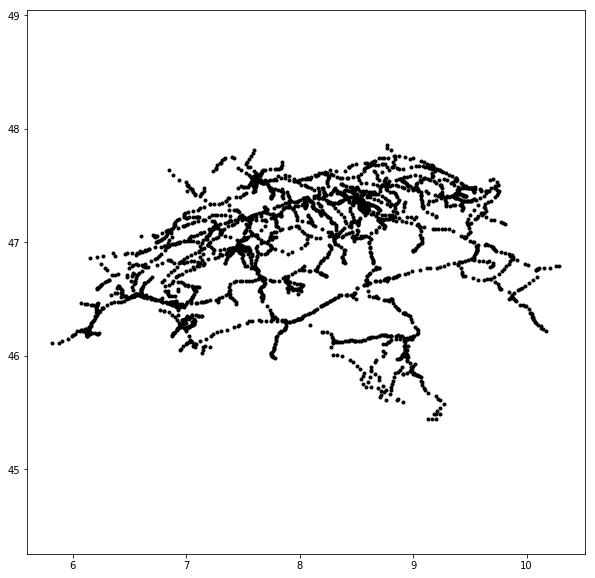

In [64]:
import matplotlib.pyplot as plt

def plot_hubs(hubs, labelNames = False):
    fig = plt.figure(figsize=(10,10))
    x =[]; y = []; names = [];
    for h in hubs:
        new_x = hubs[h].x
        new_y = hubs[h].y
        x.append(new_x)
        y.append(new_y)
        if labelNames:
            plt.text(new_x+0.01, new_y+0.01, h, fontsize=9)              
    plt.scatter(x,y, marker='.', color='black')  
    plt.axis('equal')
    plt.show()
    
plot_hubs(sbb.hubs)

With a little imagination and geographic knowledge you can recognize the different regions of Switzerland.

We want to implement a search algorithm that finds the shortest way between 'Rotkreuz' and 'Thalwil'. In this exercise, we are not restricted to the official train lines. We can use the railway system with our own search agent and decide at each hub in which direction we want to go. If you have successfully implemented the classes above, the following code should execute and provide the directions between Rotkreuz and Zermatt.

The search algorithm reached Thalwil with a cost of 36.906.
The path is the following: > Rotkreuz > Hunenberg_Chamleten > Hunenberg_Zythus > Cham > Cham_Alpenblick > Zug_Chollermuli > Zug_Schutzengel > Zug > Zug_Nord_Abzw > Baar_Lindenpark > Baar_Neufeld > Baar > Litti_Baar > Sihlbrugg > Horgen_Oberdorf > Oberrieden_Dorf > Thalwil
The search algorithm reached Thalwil with a cost of 1362.7200000000005.
The path is the following: > Rotkreuz > Bruglen_Spw > Immensee_West_Abzw > Kussnacht_am_Rigi > Merlischachen > Meggen > Meggen_Zentrum > Luzern_Verkehrshaus > Gutsch_Abzw > Fluhmuhle_Abzw > Emmenbrucke > Emmenbrucke_Gersag > Hubeli_LU > Waldibrucke > Eschenbach > Ballwil > Hochdorf_Schonau > Hochdorf > Baldegg_Kloster > Baldegg > Gelfingen > Hitzkirch > Ermensee > Mosen > Beinwil_am_See > Birrwil > Boniswil > Boniswil_Nord > Hallwil > Seon > Lenzburg_Seetal > Lenzburg_West_Abzw > Hunzenschwil > Suhr > Oberentfelden > Kolliken > Kolliken_Oberdorf > Safenwil > Walterswil-Striegel > Kungoldi

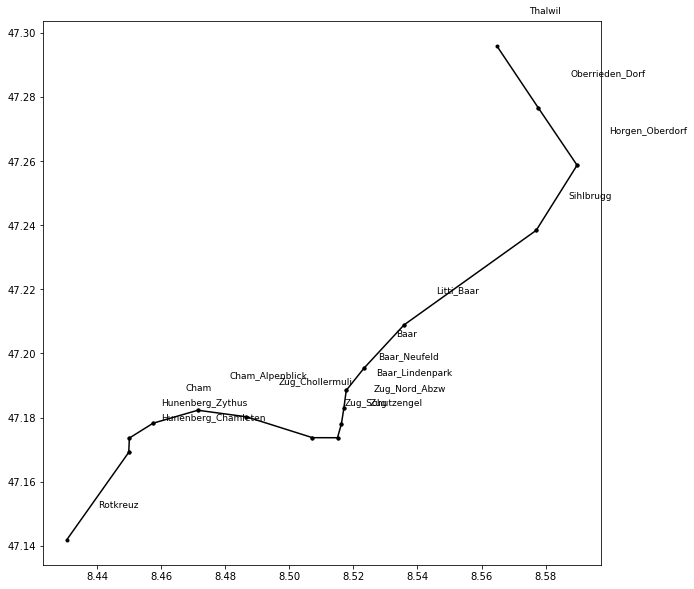

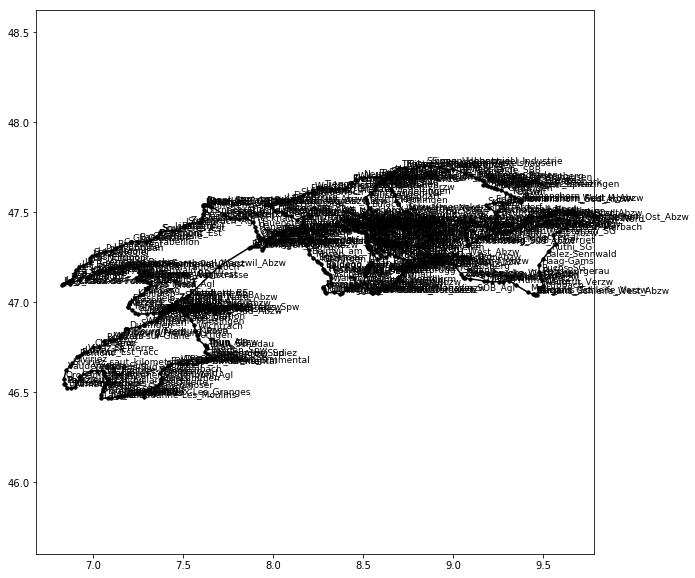

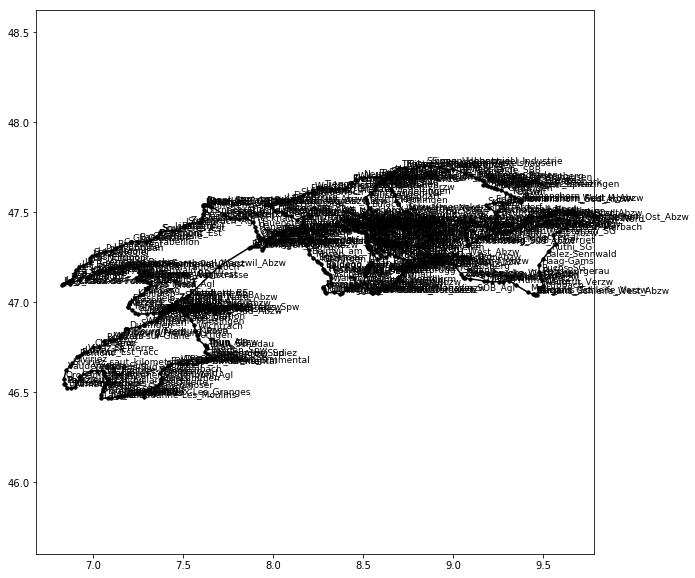

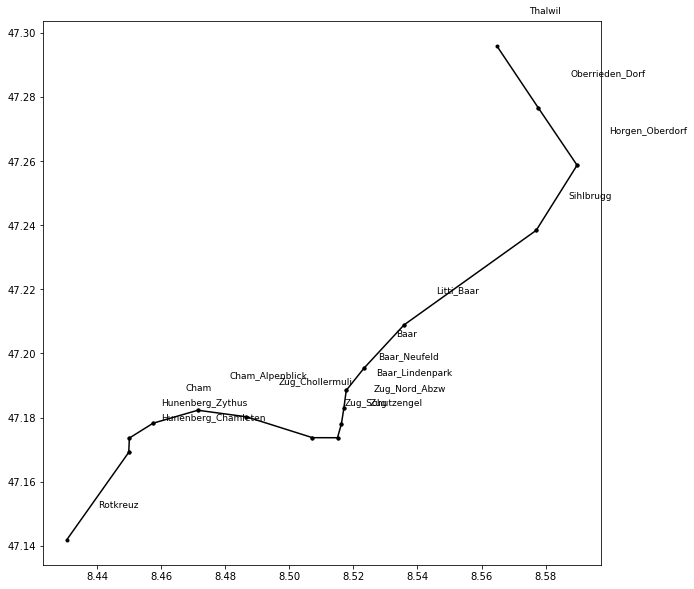

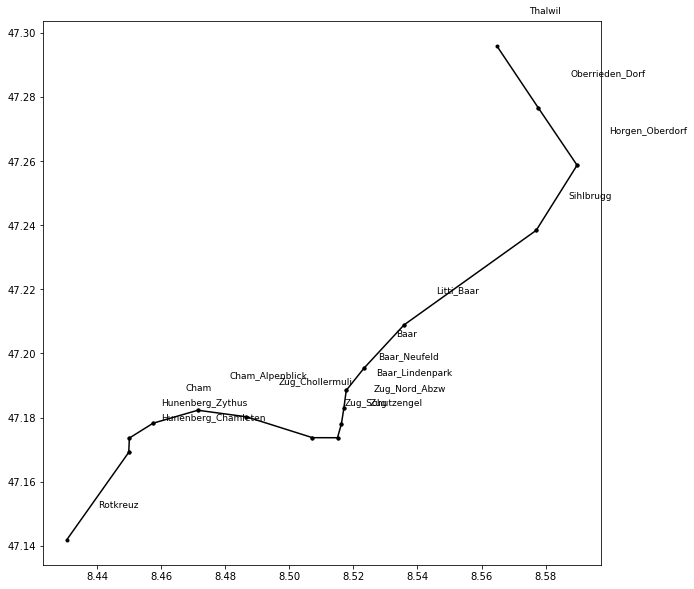

In [65]:
start = 'Rotkreuz'
goal = 'Thalwil'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)

## BFS
node = breadth_first_graph_search(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

## DFS
node = deapth_first_graph_search(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

## DLS
node = deapth_limited_graph_search(problem, 10000)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

## IDS
node = iterative_deepening_search(problem, 10000)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

## UCS
node = uniform_cost_search(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

##  More Uninformed Search Algorithms ##

As you know, the breadth-search algorithm is just one of many search strategies. Implement the following search algorithms and evaluate their performance. You might have to adapt (or create a subclass) of certain classes we used before, to determine the depth of the search tree for example. You can use the PriorityQueue class below to implement the Uniform Cost Search.

1. Depth First Search (DFS)
1. Depth Limited Search (DLS)
1. Iterative Deepening Search (IDS)
1. Uniform Cost Search (UCS)

Try to visualize which nodes (hubs) have been visited by the search algorithm. Create for each search strategy an image that shows the start, the goal, the solution path and all the visited nodes.

Answer the following questions for each algorithm:

1. How does your algorithm deal with loops? 
1. Can you make an estimate about the time and memory requirements? 
1. Is your algorithm complete and optimal?

Fill the following table:

| Algorithm | start   | goal | cost | number of nodes visited | maximal stored nodes | complete | optimal | loops? |
|------|------|-----|-----|-----|-----|-----|-----|-----|
| BFS|Rotkreuz|Thalwil|O(b^d) 37.272|17|179|yes | yes if every action has identical non- negative costs, else -> no| we store the visited nodes in a set 
| DFS|Rotkreuz|Thalwil|Time complexity = O(b^n) Space = O(b*m) 106.086|54|99|only for graph based search and finite search spaces | yes | we store the visited nodes in a set
| DLS|Rotkreuz|Thalwil|Time = O(b^l) Space = O(b*l) 106.086|54|99|no| first solution might not be optimal | we store the visited nodes in a set
| IDS|Rotkreuz|Thalwil|Time = O(b^d) Space = O(b*d) 37.272|17|179|semi | yes | we store the visited nodes in a set
| UCS|Rotkreuz|Thalwil|$O(b^ {1+[C^*\epsilon]})$ 36.906|17|171| yes | yes for non-negative action costs | we store the visited nodes in a set



What is special about the sbb railway map in terms of complexity (branching factor, depth)? 
How could you preprocess the data set in order to reduce the search space?

Answer: The branching factor is enormous and the depth is unlimited because of cycles. If we know the goal we could remove unnecessary regions.
Delete invalid stations, e.g. immensee_West_ Abzw

In [66]:
from heapq import heappush, heappop, heapify


class PriorityQueue:
    """A Queue in which the minimum (or maximum) element (as determined by f and
    order) is returned first.
    If order is 'min', the item with minimum f(x) is
    returned first; if order is 'max', then it is the item with maximum f(x).
    Also supports dict-like lookup."""

    def __init__(self, order='min', f=lambda x: x.path_cost):
        self.heap = []

        if order == 'min':
            self.f = f
        elif order == 'max':  # now item with max f(x)
            self.f = lambda x: -f(x)  # will be popped first
        else:
            raise ValueError("order must be either 'min' or max'.")

    def append(self, item):
        """Insert item at its correct position."""
        heappush(self.heap, (self.f(item), item))

    def extend(self, items):
        """Insert each item in items at its correct position."""
        for item in items:
            self.append(item)

    def pop(self):
        """Pop and return the item (with min or max f(x) value
        depending on the order."""
        if self.heap:
            return heappop(self.heap)[1]
        else:
            raise Exception('Trying to pop from empty PriorityQueue.')

    def __len__(self):
        """Return current capacity of PriorityQueue."""
        return len(self.heap)

    def __contains__(self, item):
        """Return True if item in PriorityQueue."""
        return (self.f(item), item) in self.heap

    def __getitem__(self, key):
        for _, item in self.heap:
            if item == key:
                return item

    def __delitem__(self, key):
        """Delete the first occurrence of key."""
        self.heap.remove((self.f(key), key))
        heapify(self.heap)